# Part II - (Dataset Explanatory FordGoBike)
## by (Tejas Santosh Kale)

## Investigation Overview

In this inquiry, I wanted to look at what time of day and day of the week most journeys are taken, how long the typical trip takes, and whether the results of previous investigations differ depending on whether a user is a subscriber or a consumer.

## Dataset Overview

The data consists of information regarding approximately 183,000 rides made in a bike-sharing system covering the greater San Francisco Bay area. The data features include duration (secs) and others such as DateTime, customer type, and gender, as well as additional variables such as member's year of birth, start and end station name, start and end station longitude and latitude, start and end station unique id among others. About 8000 data points were removed from the analysis due to inconsistencies or missing information.

The dataset has 183,412 rows and 11 columns after adequate data preparation for exploration:
    
start_time (datetime).
start_station_name (object)
end_station_name (object)
user_type (categorical) - Subscriber and Customer.
member_gender (categorical) - Male, Female and Other

Also, new columns were created:

day_of_week: to store week day number from start_time.
start_hour: to store hour number from start_time.
time_of_day: to store the time of the day from start_hour
duration_min: to store the duration in minutes.
user_age: to store the user's age from member
user_age_bin: grouped/binned ages for age group exploration

In [34]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [35]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [36]:
df.dropna(inplace=True)

df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['bike_id'] =df.bike_id.astype(str)


import datetime as dt
df['start_day'] = df['start_time'].dt.day_name()
df['start_month'] = df['start_time'].dt.month_name()
# bike['start_year'] = bike['start_time'].dt.year
df['start_hr'] = df['start_time'].dt.hour
df['start_hr'] = df.start_hr.astype(str)




df['end_day'] = df['end_time'].dt.day_name()
df['end_month'] = df['end_time'].dt.month_name()
df['end_hr'] = df['end_time'].dt.hour
df['end_hr'] = df.end_hr.astype(str)

In [37]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                   'start_hr': [str(i) for i in range(0,24)],
                   'end_hr': [str(i) for i in range(0,24)]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [38]:
def plot_label(x_label, y_label, title):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

In [39]:
# make a copy of the original dataset to clean
df_new = df.copy()

## Distribution of Rides by Days
Most rides were taken on Thursdays and Tuesdays. Weekends have the lowest trip records

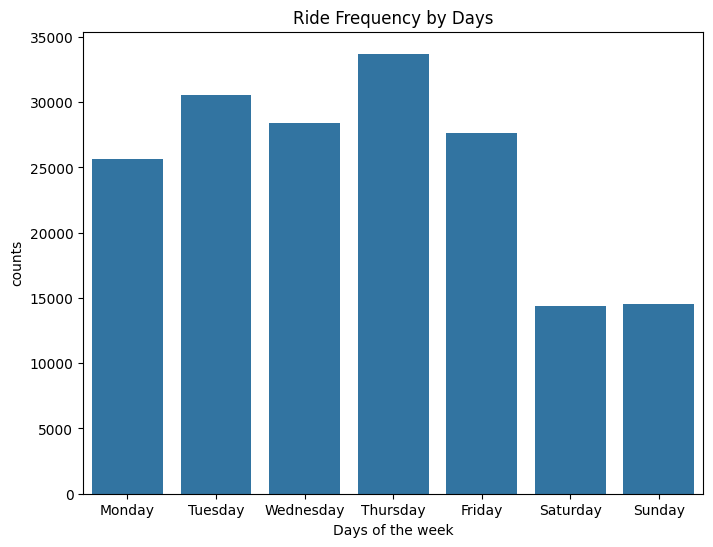

In [40]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'start_day', color = sns.color_palette()[0])
plot_label("Days of the week", "counts", "Ride Frequency by Days")


## Hourly Distribution of Rides
The greater morning (8th and 9th hours) and evening (17th and 18th hours) ride frequencies can be attributed to rush hours when people go for work and return later in the evening.

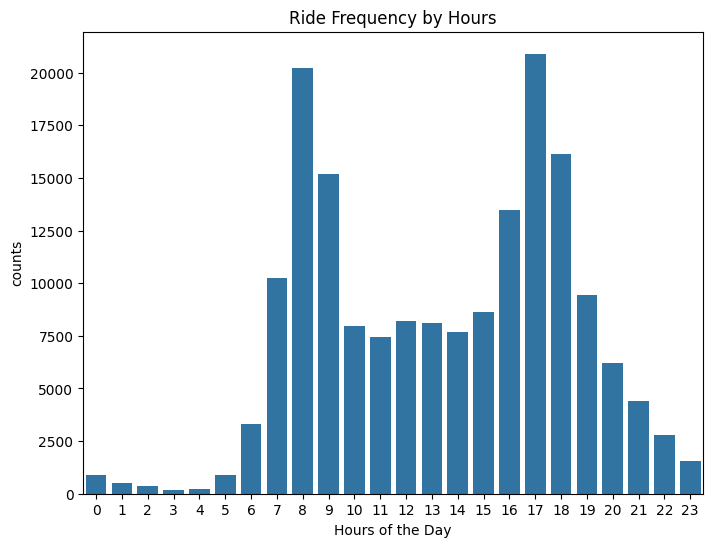

In [41]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'start_hr', color = sns.color_palette()[0])
plot_label("Hours of the Day", "counts", "Ride Frequency by Hours")


## Distribution of Rides by User Type
Subscribers account for over 90% of the total rides

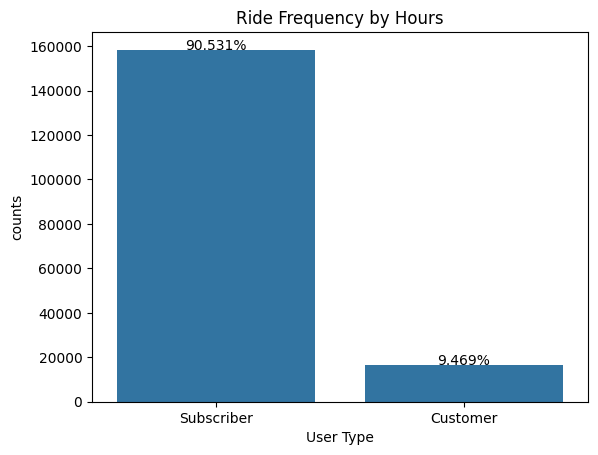

In [42]:
ax = sns.countplot(data = df, x = 'user_type',  color=sns.color_palette()[0], order=df.user_type.value_counts().index)

total = len(df)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plot_label("User Type", "counts", "Ride Frequency by Hours")


## Trip Duration vs user type
The types of use us the bike for the duration of time

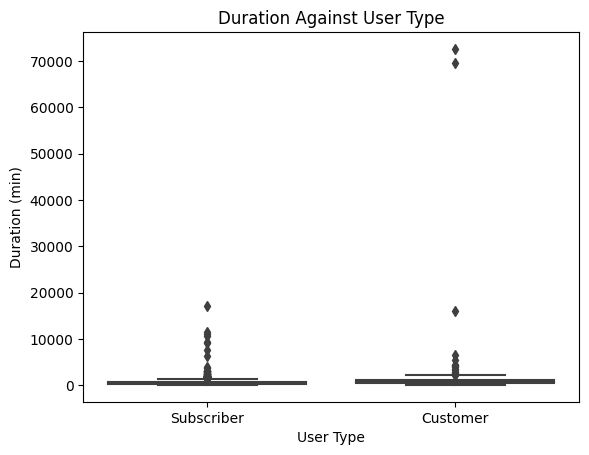

In [54]:

# Check if the number of samples is valid
if len(df_new) < 1834:
    raise ValueError("The DataFrame does not have enough rows for 1834 samples.")

# Generate a random sample of data
samples = np.random.choice(df_new.index, 1834, replace=False)  # Use 'df_new.index' to get valid indices

# Create a DataFrame with the selected samples
df_new_samp = df_new.loc[samples, :]

# Set the base color for the boxplot
base_color = sns.color_palette()[0]

# Create a boxplot
sns.boxplot(data=df_new_samp, x='user_type', y='duration_sec', color=base_color)

# Customize labels and title
plot_label("User Type","Duration (min)","Duration Against User Type")

# Show the plot
plt.show()

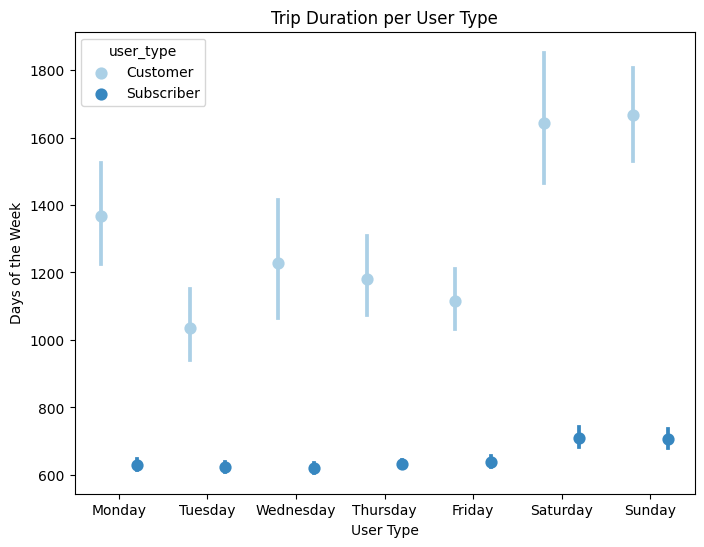

In [55]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = df, x ='start_day', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.xlabel('User Type')
plt.ylabel('Days of the Week')
plt.title('Trip Duration per User Type')
# plt.yscale('log')
# plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True);

In [56]:
# Use this command if you are running this file in local
!jupyter nbconvert Ford_GoBike_System_Data_Part_2.ipynb --to slides --post serve --no-input --no-prompt

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'Ford_GoBike_System_Data_Part_2.ipynb' matched no files


In [57]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Part_II_explanatory_Gobike.ipynb

[NbConvertApp] Converting notebook Part_II_explanatory_Gobike.ipynb to html
[NbConvertApp] Writing 827833 bytes to Part_II_explanatory_Gobike.html
